Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.
After loading the US_states(5m).json file as a geodataframe, use the following code to create a geodataframe that only contains the contiguous United States (48 states):
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]
The longitude column data should be turned into negative values(data source listed longitude direction instead of positive/negative). Use the following code to make the data correct:
michaeldf['Long'] = 0 - michaeldf['Long']

In [49]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [50]:
location='hurricaneMichael.csv'
huri_df=pd.read_csv(location)
huri_df.head(1)

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven


In [51]:
len(huri_df)

45

In [52]:
no_nulldf=huri_df.notnull

In [53]:
huri_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [54]:
huri_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [55]:
huri_df['Long']=0-huri_df['Long']

In [56]:
huri_df['corrdinates']=list(zip(huri_df.Long,huri_df.Lat))

In [57]:
huri_df.head(1)

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,corrdinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,"(-86.6, 18.0)"


In [58]:
huri_df['corrdinates']=huri_df['corrdinates'].apply(Point)

In [59]:
huri_df.head(1)

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,corrdinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)


In [60]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_hurri = gpd.GeoDataFrame(huri_df, geometry='corrdinates')

In [61]:
geo_hurri.head(1)

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,corrdinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.60000 18.00000)


In [62]:
filepath = "us_state.json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [63]:
len(map_df)

52

In [94]:
map1=map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','California']) == False]

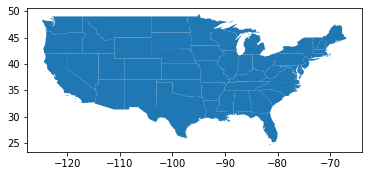

In [65]:
map1.plot()

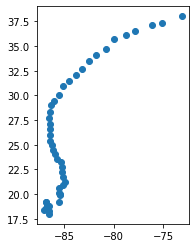

In [66]:
geo_hurri.plot()

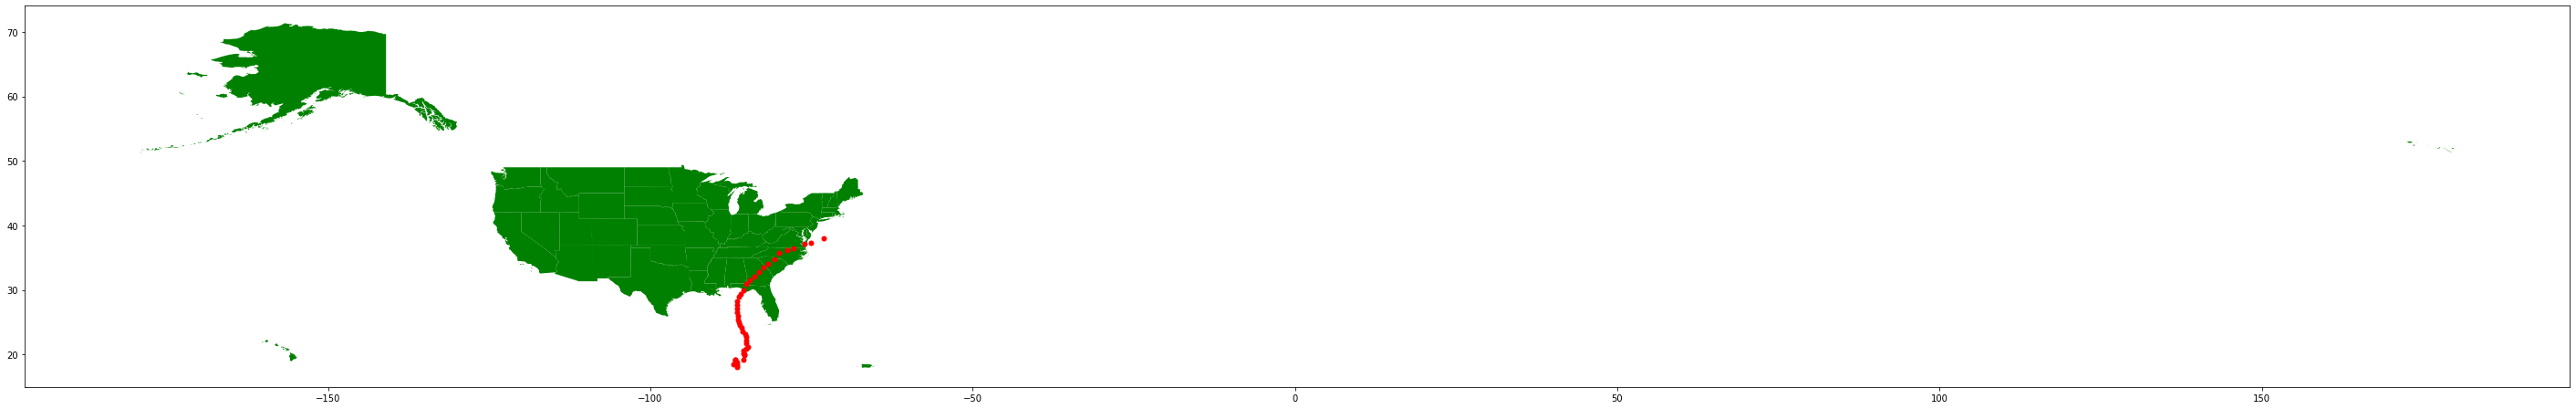

In [97]:
fig, ax = plt.subplots(1, figsize=(50,60))
basemap = map_df.plot(ax=ax,color='green')
geo_hurri.plot(ax=basemap, color='red', marker=".", markersize=100)
